**Importing the Libraries**

In [ ]:
import tensorflow as tf  # The main TensorFlow library

# For defining the model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# To handle data preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

# For performance metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# For text preprocessing (if not done earlier)
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Loading the Data**

In [ ]:
data=pd.read_csv('/content/comments43000.csv')
data.head()

,Comment,Number of Likes,sentiment
0,Thanks man,0.0,positive
1,where to learn the skills and get certificates?,0.0,question
2,Thanks brother,0.0,positive
3,"Kardden Token is next atleast 40x coin, upswin...",0.0,positive
4,"Thanks, please make another video about Kardde...",0.0,request


In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
positive,20185
neutral,13495
negative,4375
question,3185
request,1175


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming labels are in a single column 'label'
le = LabelEncoder()

# Create a new column 'Label_Encoded' with numerical labels
data['Label_Encoded'] = le.fit_transform(data['sentiment'])

# To check the mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'negative': 0, 'neutral': 1, 'positive': 2, 'question': 3, 'request': 4, nan: 5}


In [ ]:
# Drop rows in place where 'Label_Encoded' is 5
data = data[data['Label_Encoded'] != 5]

In [ ]:
data['Label_Encoded'].value_counts()

,count
Label_Encoded,
2,20185
1,13495
0,4375
3,3185
4,1175


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Split features and labels
X = data['Comment']  # Features (text data)
y = data['Label_Encoded']  # Labels

# Step 2: Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features based on your data
X_vectorized = vectorizer.fit_transform(X)

# Step 3: Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X_vectorized, y)

# Step 4: Split data into training, validation, and test sets
# First, split into train + validation and test (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)

# Then, split the train+val set into separate train and validation sets (75% train, 25% validation from the 80% train+val)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Check the shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (60555, 5000)
y_train shape: (60555,)
X_val shape: (20185, 5000)
y_val shape: (20185,)
X_test shape: (20185, 5000)
y_test shape: (20185,)


**Tensorflow Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the neural network architecture
def create_model(input_size, num_classes):
    model = Sequential()

    # Input layer
    model.add(Dense(64, input_dim=input_size, activation='relu'))  # Hidden layer with 128 neurons
    model.add(Dropout(0.4))  # Dropout for regularization

    # Additional hidden layers (you can add more or fewer as per need)
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer (Softmax for multi-class classification)
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Model parameters
input_size = X_train.shape[1]  # Number of features from TF-IDF
num_classes = len(le.classes_)  # Number of classes (5 in your case)

# Create the model
model = create_model(input_size=input_size, num_classes=num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Suitable for multi-class classification
              metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │         320,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 324,614 (1.24 MB)

 Trainable params: 324,614 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

**Training the Model**

In [ ]:
# Convert TF-IDF matrices to NumPy arrays
X_train_array = X_train.toarray()
X_val_array = X_val.toarray()
X_test_array = X_test.toarray()

# Training the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train_array, y_train,
                    validation_data=(X_val_array, y_val),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping])



Epoch 1/50
1893/1893 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5454 - loss: 1.1057 - val_accuracy: 0.8435 - val_loss: 0.4881
Epoch 2/50
1893/1893 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8239 - loss: 0.5001 - val_accuracy: 0.8799 - val_loss: 0.3810
Epoch 3/50
1893/1893 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8803 - loss: 0.3560 - val_accuracy: 0.8975 - val_loss: 0.3365
Epoch 4/50
1893/1893 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9058 - loss: 0.2866 - val_accuracy: 0.9065 - val_loss: 0.3085
Epoch 5/50
1893/1893 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9261 - loss: 0.2313 - val_accuracy: 0.9128 - val_loss: 0.2909
Epoch 6/50
1893/1893 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9359 - loss: 0.2026 - val_accuracy: 0.9188 - val_loss: 0.2920
Epoch 7/50
1893/1893 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9452 - loss: 0.1753 - val_accuracy: 0.9243 - val_loss: 0.2859
Epoch 8/50
1893/1893 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9525 - loss: 0.1522

**Evaluate the Model**

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_array, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy * 100:.2f}%')

# Generate predictions for the test set
y_pred = model.predict(X_test_array)
y_pred_classes = y_pred.argmax(axis=-1)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_classes))


631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9185 - loss: 0.3097
Test Loss: 0.3014335036277771, Test Accuracy: 92.14%
631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      4131
           1       0.88      0.88      0.88      4034
           2       0.90      0.87      0.89      4000
           3       0.90      0.93      0.92      4040
           4       0.99      1.00      0.99      3980

    accuracy                           0.92     20185
   macro avg       0.92      0.92      0.92     20185
weighted avg       0.92      0.92      0.92     20185



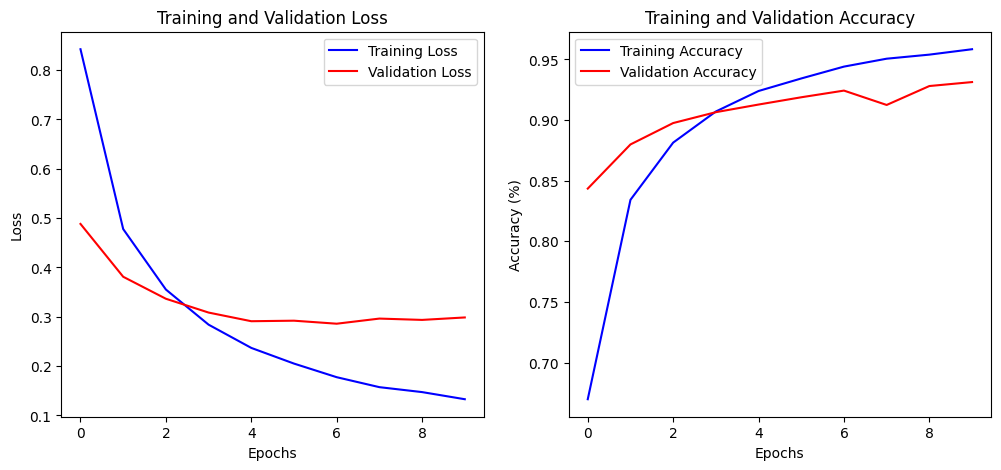

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b', label='Training Loss')
plt.plot(history.history['val_loss'], 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()
